In [32]:
import random 

import torch
import matplotlib.pyplot as plt

# Observed/training input and output
train_x = torch.tensor([[0.0, 0.0], [0.0, 1.0], [1.0, 0.0], [1.0, 1.0]]).reshape(-1, 2) 
train_y = torch.tensor([[0.0], [1.0], [1.0], [0.0]]).reshape(-1, 1)

In [37]:
class XORLogicGateModel:
	
    def __init__(self):
        self.W1 = torch.tensor([[random.uniform(-1.0, 1.0), random.uniform(-1.0, 1.0)],
                                [random.uniform(-1.0, 1.0), random.uniform(-1.0, 1.0)]],
                               requires_grad=True)
        self.b1 = torch.tensor([[random.uniform(-1.0, 1.0), random.uniform(-1.0, 1.0)]],
                               requires_grad=True)
        self.W2 = torch.tensor([[random.uniform(-1.0, 1.0)], [random.uniform(-1.0, 1.0)]],
                               requires_grad=True)
        self.b2 = torch.tensor([[random.uniform(-1.0, 1.0)]],
                               requires_grad=True)

    # First layer function
    def f1(self, x):
        return torch.sigmoid(x @ self.W1 + self.b1)

    # Second layer function
    def f2(self, h):
        return torch.sigmoid(h @ self.W2 + self.b2)

    # Predictor
    def f(self, x):
        return self.f2(self.f1(x))

    # Uses Cross Entropy
    def loss(self, x, y):
        return torch.nn.functional.binary_cross_entropy(self.f(x), y)


In [38]:
model = XORLogicGateModel()

optimizer = torch.optim.SGD([model.b1, model.b2, model.W1, model.W2], lr=0.1)
for epoch in range(50_000):
	model.loss(train_x, train_y).backward()
	optimizer.step()
	optimizer.zero_grad()

print("Model 1 W1 = %s, b1 = %s, W2 = %s, b2 = %s, loss = %s" %(model.b1, model.W1, model.W2, model.b2, model.loss(train_x, train_y)))


Model 1 W1 = tensor([[-9.1972,  3.0790]], requires_grad=True), b1 = tensor([[ 5.9493, -7.3939],
        [ 5.9496, -7.3953]], requires_grad=True), W2 = tensor([[-13.8517],
        [-13.6654]], requires_grad=True), b2 = tensor([[6.7605]], requires_grad=True), loss = tensor(0.0021, grad_fn=<BinaryCrossEntropyBackward>)


C:\Users\Eirik\AppData\Local\Temp/ipykernel_7572/1571980124.py:5: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


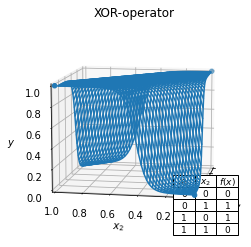

In [39]:
import numpy as np 

# Visualize result
fig = plt.figure('Oppgave C')
ax = fig.gca(projection='3d')
plt.title('XOR-operator')
# set axes limits, labels and create a table of the XOR
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_zlim(0, 1)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$y$')
plt.table(cellText=[[0, 0, 0], [0, 1, 1], [1, 0, 1], [1, 1, 0]],
          colWidths=[0.1] * 3,
          colLabels=["$x_1$", "$x_2$", "$f(x)$"],
          cellLoc="center",
          loc="lower right")

x1 = np.arange(0, 1, 0.02)  # Set x1-values on the grid
x2 = np.arange(0, 1, 0.02)  # Set x2-values on the grid
# Calculate y-axis values
y = np.empty([len(x1), len(x2)], dtype=np.double)
for t in range(len(x1)):
    for r in range(len(x2)):
        y[t, r] = float(model.f(torch.tensor([float(x1[t]), float(x2[r])])))

x1, x2 = np.meshgrid(x1, x2)  # Create meshgrid
surf = ax.plot_wireframe(x1, x2, np.array(y))  # Plots the wireframe

# Scatter/plot the points for f(x1, x2) in x_train
xer = [float(x[0]) for x in train_x]
yer = [float(x[1]) for x in train_x]
ax.scatter(xer, yer, train_y)

float(model.f(torch.tensor([1.0, 0.0])))

# Customize the view angle so it's easier to see that the scatter points lie
# on the plane y=0
ax.view_init(elev=10, azim=-170)

plt.show()